Test Accuracy: 0.78
Confusion Matrix:
 [[34  3]
 [19 44]]


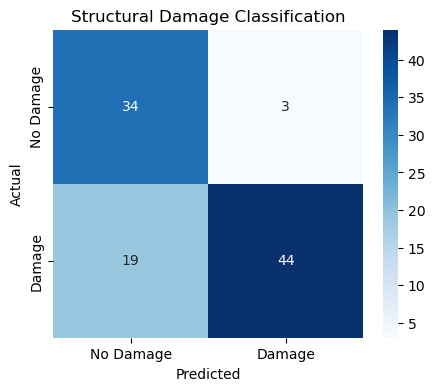

In [1]:
!pip install scikit-learn numpy matplotlib
 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
 

# Simulate a dataset: 0 = No Damage, 1 = Damage
X, y = make_classification(n_samples=500, n_features=10, n_informative=6,
                           n_redundant=2, n_classes=2, random_state=42)
 
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 

from sklearn.base import BaseEstimator, ClassifierMixin
 
class ArtificialImmuneClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_clones=5, mutation_rate=0.1, n_generations=10):
        self.n_clones = n_clones
        self.mutation_rate = mutation_rate
        self.n_generations = n_generations
        self.memory_cells = []
 
    def _affinity(self, antibody, antigen):
        return -np.linalg.norm(antibody['vector'] - antigen)
 
    def fit(self, X, y):
        self.memory_cells = [{'vector': x, 'label': label} for x, label in zip(X, y)]
 
        for gen in range(self.n_generations):
            new_memory = []
            for antigen, label in zip(X, y):
                # Select best match (BMU)
                bmu = max(self.memory_cells, key=lambda ab: self._affinity(ab, antigen))
                clones = [dict(bmu) for _ in range(self.n_clones)]
 
                # Hypermutation
                for clone in clones:
                    noise = np.random.normal(0, self.mutation_rate, size=antigen.shape)
                    clone['vector'] += noise
 
                # Evaluate clones
                best_clone = max(clones, key=lambda ab: -np.linalg.norm(ab['vector'] - antigen))
 
                # Add if improved match
                if self._affinity(best_clone, antigen) > self._affinity(bmu, antigen):
                    new_memory.append({'vector': best_clone['vector'], 'label': label})
                else:
                    new_memory.append(bmu)
 
            self.memory_cells = new_memory
        return self
 
    def predict(self, X):
        preds = []
        for x in X:
            bmu = max(self.memory_cells, key=lambda ab: -np.linalg.norm(ab['vector'] - x))
            preds.append(bmu['label'])
        return np.array(preds)
model = ArtificialImmuneClassifier(n_clones=10, mutation_rate=0.05, n_generations=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
 
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)
 
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
 

import seaborn as sns
 
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Damage', 'Damage'], yticklabels=['No Damage', 'Damage'])
plt.title('Structural Damage Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()